In [33]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
conda install -c anaconda graphviz

Solving environment: done

## Package Plan ##

  environment location: /Users/admin/opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       h691a603_2         1.4 MB  anaconda
    conda-23.1.0               |   py39hecd8cb5_0         938 KB
    expat-2.4.4                |       he9d5cce_0         145 KB  anaconda
    font-ttf-dejavu-sans-mono-2.37|       hd3eb1b0_0         387 KB  anaconda
    font-ttf-inconsolata-2.001 |       hcb22688_0          95 KB  anaconda
    font-ttf-source-code-pro-2.030|       hd3eb1b0_0         923 KB  anaconda
    font-ttf-ubuntu-0.83       |       h8b1ccd4_0         1.8 MB  anaconda
    fontconfig-2.13.1          |       ha9ee91d_0         255 KB  anaconda
    fonts-anaconda-1           |       h8fa9717_0           2 KB  anaconda
    fonts-conda-ecosystem-1    |       hd3eb

In [1]:
import pandas as pd
import yfinance as yf

In [2]:
start = '2021-01-01'
end = '2021-10-31'

In [3]:
data = yf.download('CL=F PTTEP.BK OR.BK PTTGC.BK PTT.BK', start=start, end=end)


[*********************100%***********************]  5 of 5 completed


In [5]:
df=data.Close

In [6]:
df = df.fillna(method='ffill')
df = df.pct_change()
df = df.dropna()
df = df[['CL=F','OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']]

In [7]:
df[df['CL=F'] == 0]
#check 0.0 CL=F

,CL=F,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2021-02-15,0.0,0.162393,0.031390,0.011858,0.024845
2021-04-02,0.0,0.000000,0.013100,-0.007905,-0.006135
2021-05-31,0.0,-0.008264,0.008511,0.003968,0.006369
2021-07-05,0.0,-0.008333,0.008475,0.004167,0.006452
2021-09-06,0.0,0.000000,-0.013636,-0.024390,-0.006536
2021-09-16,0.0,-0.008621,0.004444,0.012500,0.019231
2021-10-25,0.0,0.000000,-0.023904,-0.011364,-0.012500


In [8]:
df = df[~(df['CL=F'] == 0)]

In [9]:
df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']]


,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,
2021-02-12,0.000000,0.000000,0.000000,0.000000
2021-02-16,-0.036765,-0.008696,0.035156,0.000000
2021-02-17,-0.099237,-0.008772,-0.011321,-0.012121
2021-02-18,0.025424,0.008850,0.000000,-0.006135
2021-02-19,0.041322,-0.021930,-0.030534,-0.012346
...,...,...,...,...
2021-10-22,0.000000,0.000000,0.000000,0.000000
2021-10-26,0.009009,0.012245,-0.003831,-0.006329
2021-10-27,0.000000,-0.020161,-0.019231,-0.012739


In [10]:
df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']].any(axis=1) == 0


Date
2021-02-12     True
2021-02-16    False
2021-02-17    False
2021-02-18    False
2021-02-19    False
              ...  
2021-10-22     True
2021-10-26    False
2021-10-27    False
2021-10-28    False
2021-10-29    False
Length: 179, dtype: bool

In [106]:
df.loc[~df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']].all(1) != 0]


,CL=F,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,


In [16]:
df = df.loc[~(df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']].all(1) == 0)]


In [17]:
df


,CL=F,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2021-02-17,0.018152,-0.099237,-0.008772,-0.011321,-0.012121
2021-02-19,-0.021150,0.041322,-0.021930,-0.030534,-0.012346
2021-02-23,0.002927,-0.023622,0.031674,0.028112,0.012500
2021-02-24,0.025134,-0.008065,-0.004386,-0.019531,-0.024691
2021-03-03,0.025607,0.017094,0.008889,0.027888,0.031447
...,...,...,...,...,...
2021-10-19,0.006308,-0.017699,-0.012048,-0.018727,-0.012500
2021-10-21,-0.016335,-0.008929,0.016194,-0.003774,0.012658
2021-10-26,0.010626,0.009009,0.012245,-0.003831,-0.006329


In [18]:
15/55

0.2727272727272727

In [56]:
X_train =df.iloc[:-15,:-1]
X_test = df.iloc[-15:,:-1]
y_train = df.iloc[:-15,-1]
y_test= df.iloc[-15:,-1]

In [57]:
X_train

,CL=F,OR.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2021-02-17,0.018152,-0.099237,-0.008772,-0.011321
2021-02-19,-0.021150,0.041322,-0.021930,-0.030534
2021-02-23,0.002927,-0.023622,0.031674,0.028112
2021-02-24,0.025134,-0.008065,-0.004386,-0.019531
2021-03-03,0.025607,0.017094,0.008889,0.027888
...,...,...,...,...
2021-08-23,0.053273,0.034483,0.039801,0.026549
2021-08-24,0.028946,-0.016667,0.038278,0.025862
2021-08-30,0.006837,0.016949,0.046083,0.024194


In [58]:
X_test

,CL=F,OR.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2021-09-02,0.020411,-0.008333,0.004566,0.011952
2021-09-10,0.023188,0.008696,0.004717,-0.004149
2021-09-21,0.003841,-0.008772,0.008969,0.012766
2021-09-27,0.019870,-0.017544,0.035398,0.020661
2021-10-05,0.016877,0.009091,0.008368,0.007812
2021-10-07,0.011236,0.026786,-0.012295,0.003876
2021-10-11,0.014745,-0.008696,0.016461,-0.003846
2021-10-14,0.010815,-0.008772,0.004065,0.011583
2021-10-15,0.011930,0.008850,0.004049,-0.011450


In [59]:
from sklearn.ensemble import RandomForestRegressor #another one is RandomForestClassifier


In [60]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 4)


In [61]:
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=4)

In [62]:
predictions = rf.predict(X_test)


In [63]:
compare = pd.DataFrame(y_test)
compare['predict'] = predictions
compare

,PTT.BK,predict
Date,,
2021-09-02,0.013333,0.007668
2021-09-10,0.020134,-0.007414
2021-09-21,0.012821,0.008713
2021-09-27,0.012500,0.018161
2021-10-05,0.019231,0.009488
2021-10-07,-0.012500,0.007483
2021-10-11,0.006289,-0.003281
2021-10-14,-0.012500,0.005533
2021-10-15,-0.006329,-0.007132


<AxesSubplot:xlabel='Date'>

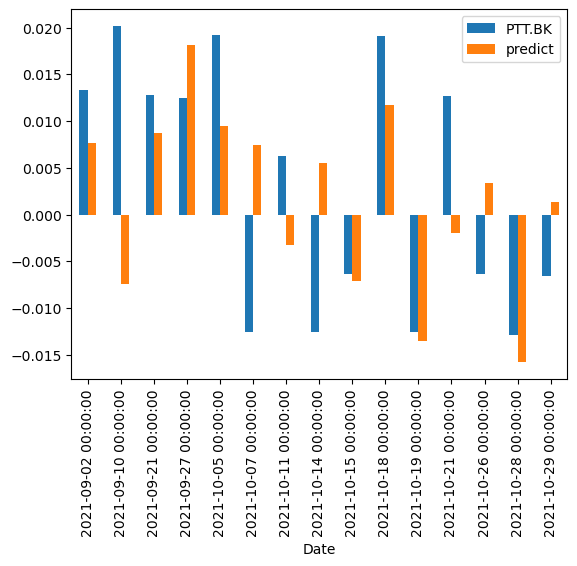

In [64]:
compare.plot(kind='bar')


In [65]:
from sklearn.tree import export_graphviz
import pydot

tree = rf.estimators_[0]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_test.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

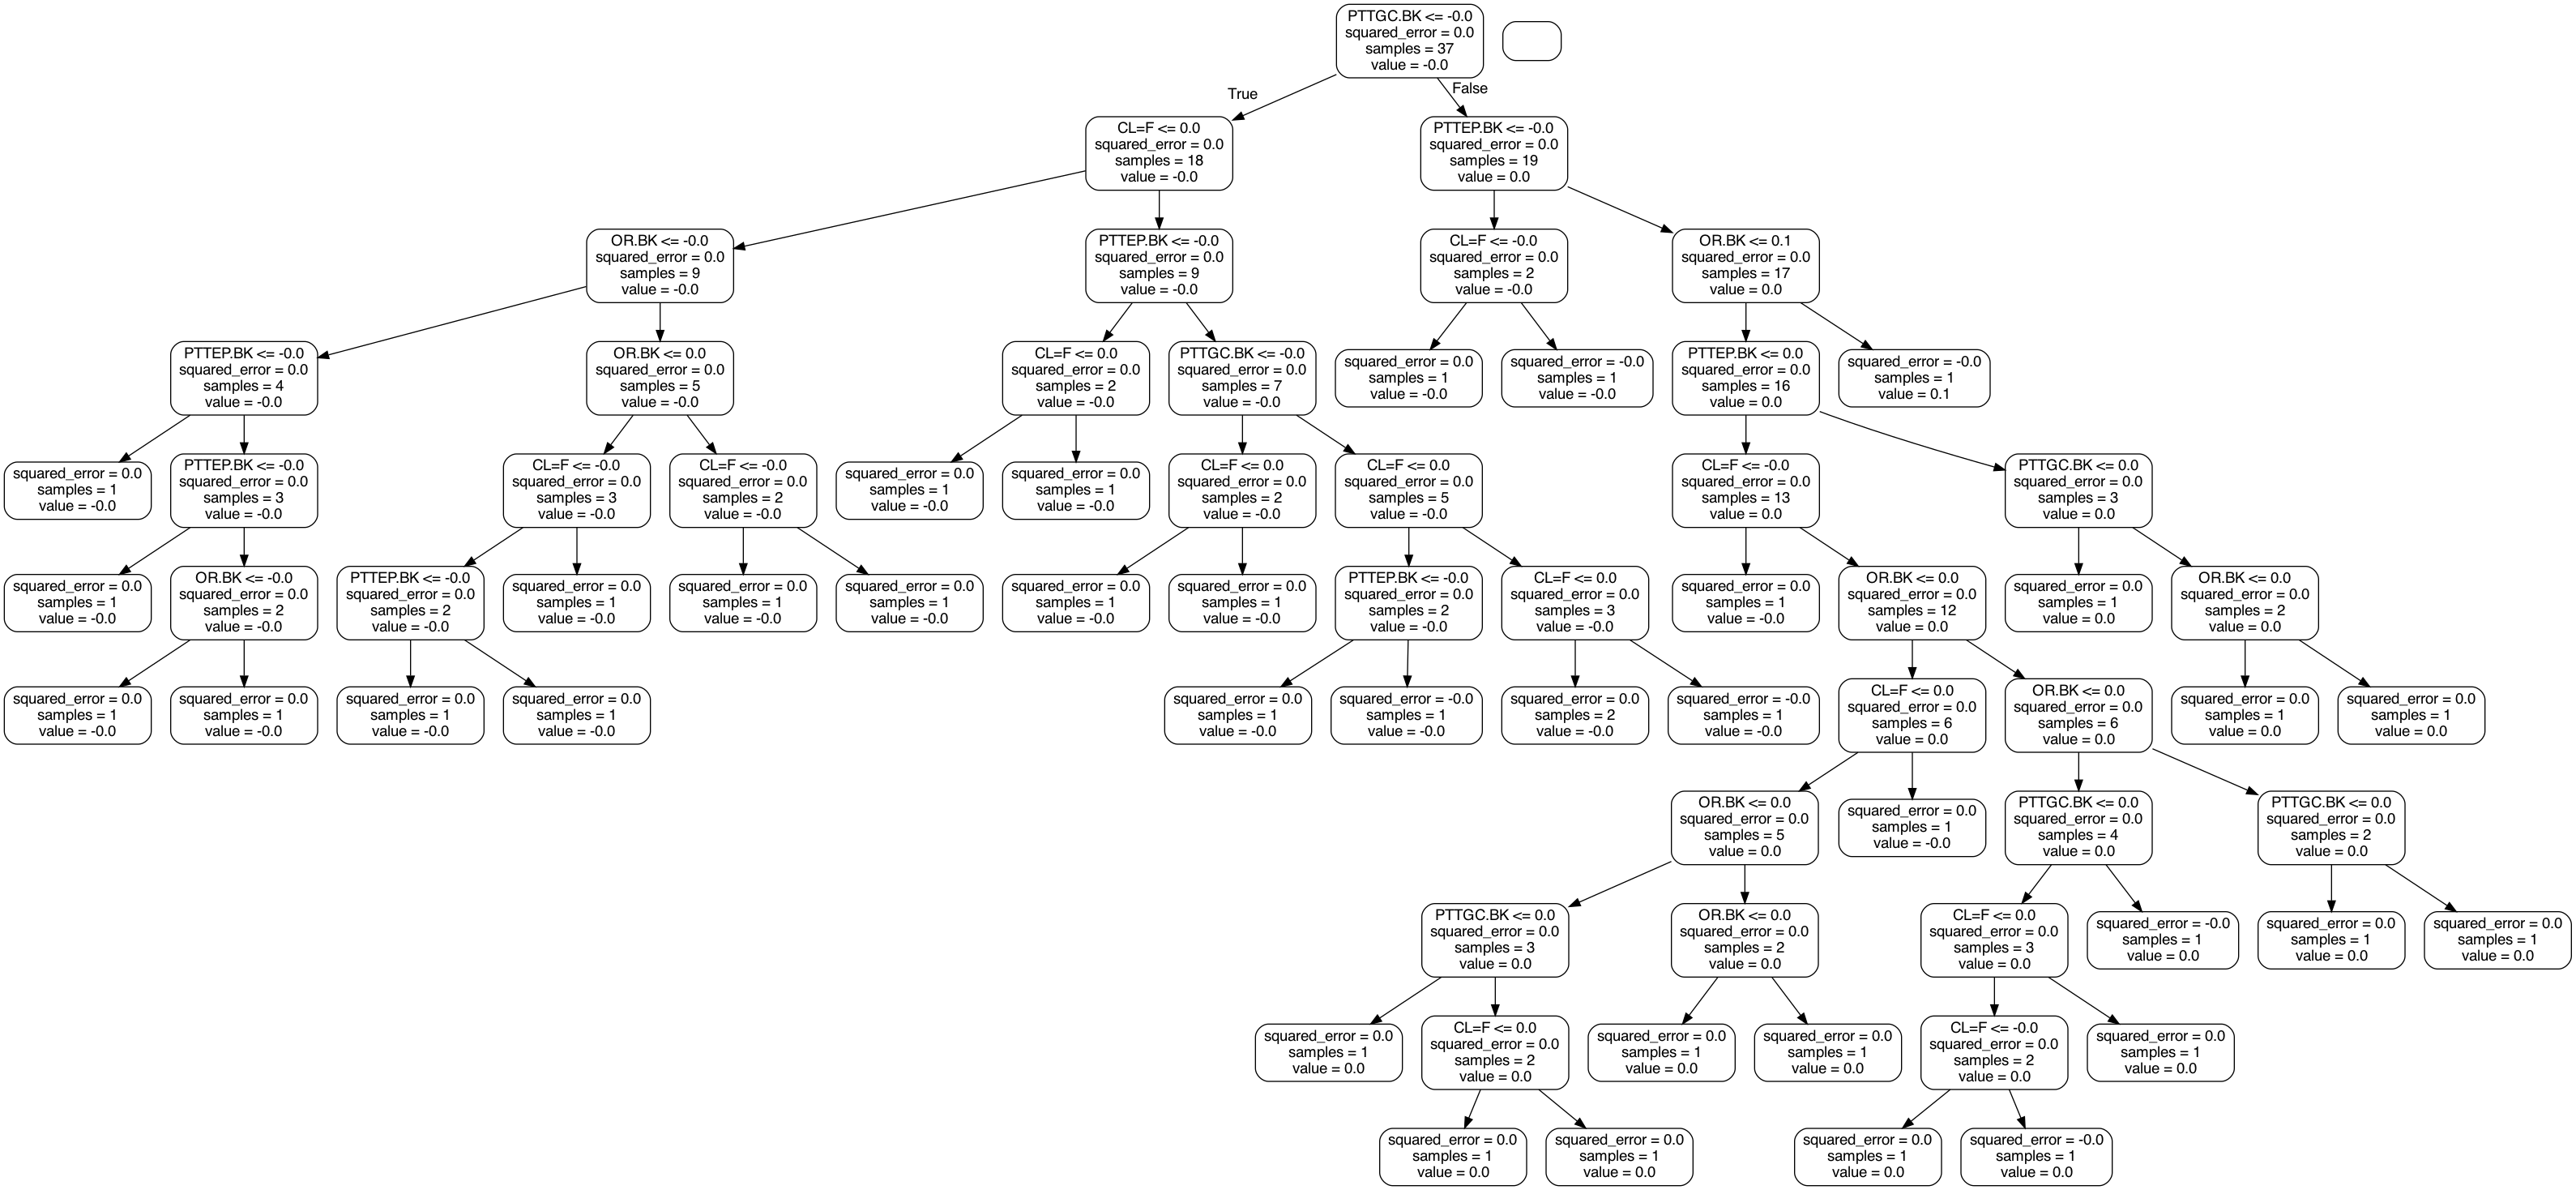

In [66]:
from IPython.display import Image
Image(filename = 'tree.png')

In [67]:
rf.feature_importances_


array([0.05271734, 0.13436679, 0.25625485, 0.55666102])

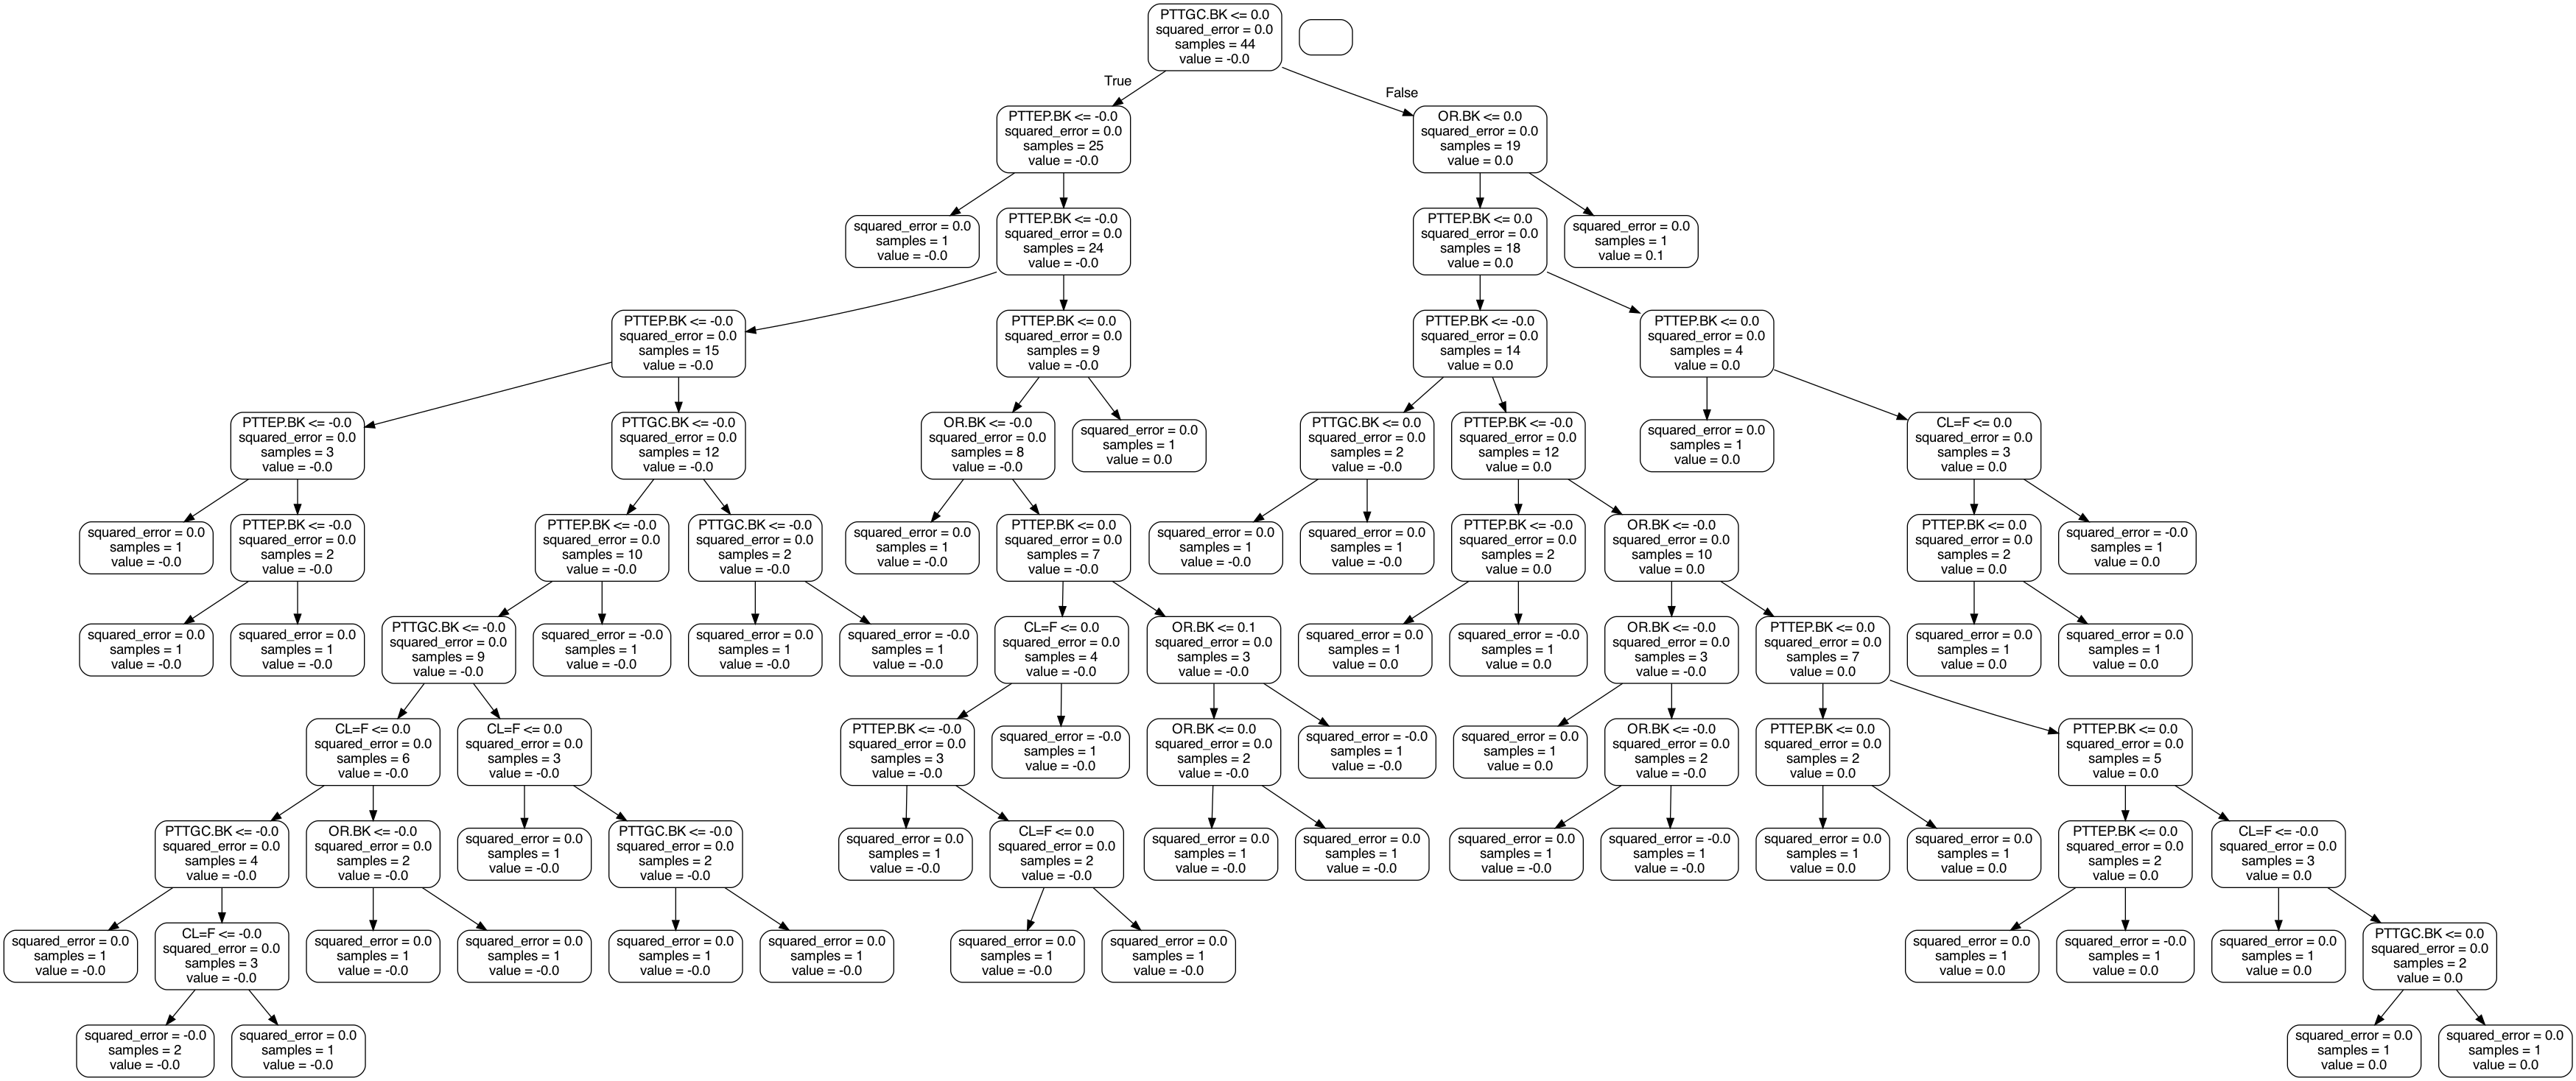

In [68]:
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_test.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree2.png')
Image(filename = 'tree2.png')

In [69]:
rf_small = RandomForestRegressor(n_estimators=100, max_depth = 3)
rf_small.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

In [70]:
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_test.columns, rounded = True, precision = 1)

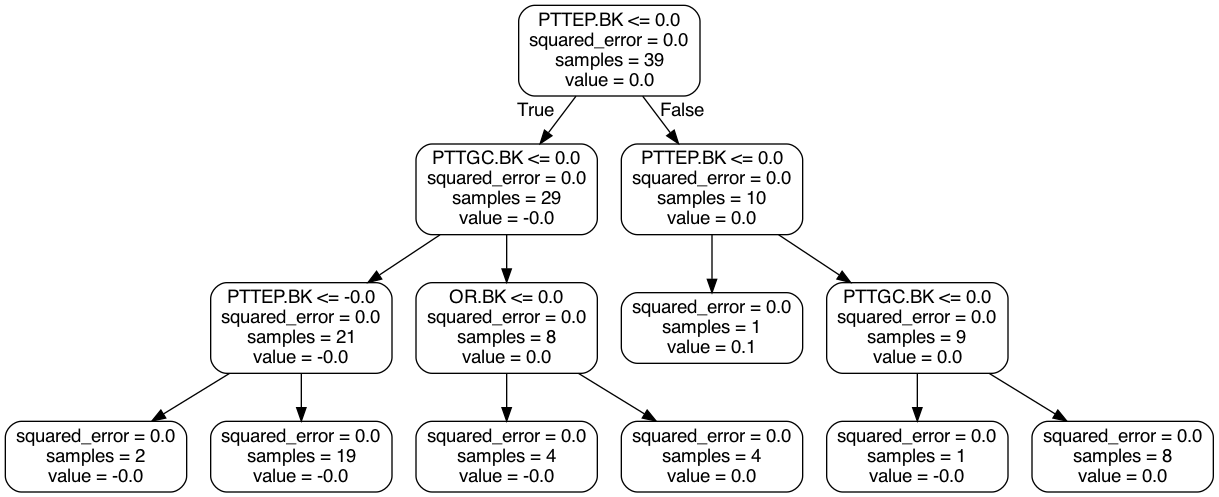

In [71]:
from subprocess import call
call(['dot', '-Tpng', 'small_tree.dot', '-o', 'small_tree.png'])
Image(filename = 'small_tree.png')

In [72]:
predict_small = rf_small.predict(X_test)


<AxesSubplot:xlabel='Date'>

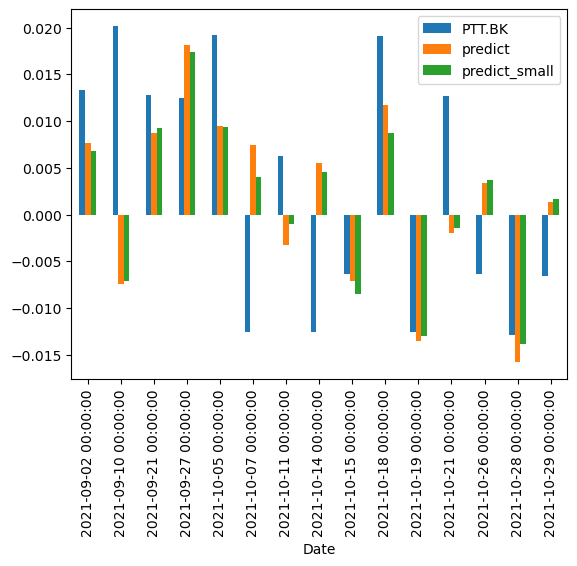

In [73]:
compare['predict_small'] = predict_small
compare.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

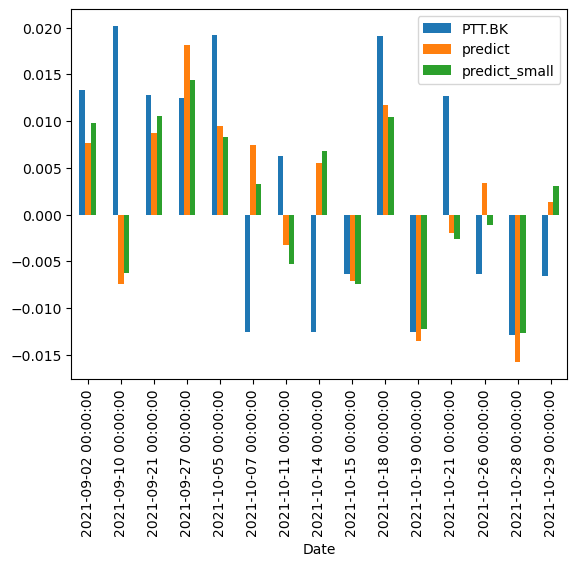

In [74]:
rf_small = RandomForestRegressor(n_estimators=100, max_depth = 2, random_state=18)
rf_small.fit(X_train, y_train)
predict_small = rf_small.predict(X_test)
compare['predict_small'] = predict_small
compare.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

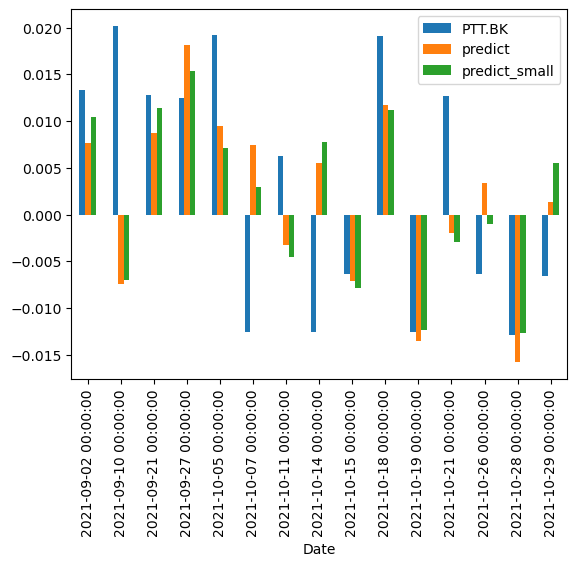

In [75]:
rf_small = RandomForestRegressor(n_estimators=1000, max_depth = 2)
rf_small.fit(X_train, y_train)
predict_small = rf_small.predict(X_test)
compare['predict_small'] = predict_small
compare.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

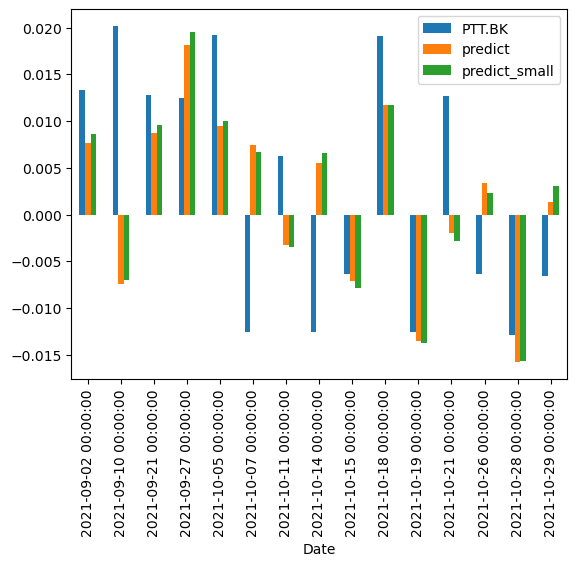

In [76]:
rf_small = RandomForestRegressor(n_estimators=200, max_depth = 5,random_state =9)
rf_small.fit(X_train, y_train)
predict_small = rf_small.predict(X_test)
compare['predict_small'] = predict_small
compare.plot(kind='bar')

In [77]:
feature_imp = pd.DataFrame(rf.feature_importances_,index=X_test.columns,columns=['Feature Importance'])
feature_imp

,Feature Importance
CL=F,0.052717
OR.BK,0.134367
PTTEP.BK,0.256255
PTTGC.BK,0.556661


In [78]:
df.corr()


,CL=F,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
CL=F,1.000000,-0.003759,0.238807,0.261011,0.172519
OR.BK,-0.003759,1.000000,0.202607,0.084339,0.317076
PTTEP.BK,0.238807,0.202607,1.000000,0.650822,0.687405
PTTGC.BK,0.261011,0.084339,0.650822,1.000000,0.691076
PTT.BK,0.172519,0.317076,0.687405,0.691076,1.000000


In [79]:
feature_imp['small'] = rf_small.feature_importances_
feature_imp.columns = [['big','small']]

In [80]:
feature_imp

,big,small
CL=F,0.052717,0.049380
OR.BK,0.134367,0.141710
PTTEP.BK,0.256255,0.256885
PTTGC.BK,0.556661,0.552024


In [81]:
X_train


,CL=F,OR.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2021-02-17,0.018152,-0.099237,-0.008772,-0.011321
2021-02-19,-0.021150,0.041322,-0.021930,-0.030534
2021-02-23,0.002927,-0.023622,0.031674,0.028112
2021-02-24,0.025134,-0.008065,-0.004386,-0.019531
2021-03-03,0.025607,0.017094,0.008889,0.027888
...,...,...,...,...
2021-08-23,0.053273,0.034483,0.039801,0.026549
2021-08-24,0.028946,-0.016667,0.038278,0.025862
2021-08-30,0.006837,0.016949,0.046083,0.024194


In [82]:
new_X_train = X_train.iloc[:,2:]
new_X_test = X_test.iloc[:,2:]
new_X_train

,PTTEP.BK,PTTGC.BK
Date,,
2021-02-17,-0.008772,-0.011321
2021-02-19,-0.021930,-0.030534
2021-02-23,0.031674,0.028112
2021-02-24,-0.004386,-0.019531
2021-03-03,0.008889,0.027888
...,...,...
2021-08-23,0.039801,0.026549
2021-08-24,0.038278,0.025862
2021-08-30,0.046083,0.024194


<AxesSubplot:xlabel='Date'>

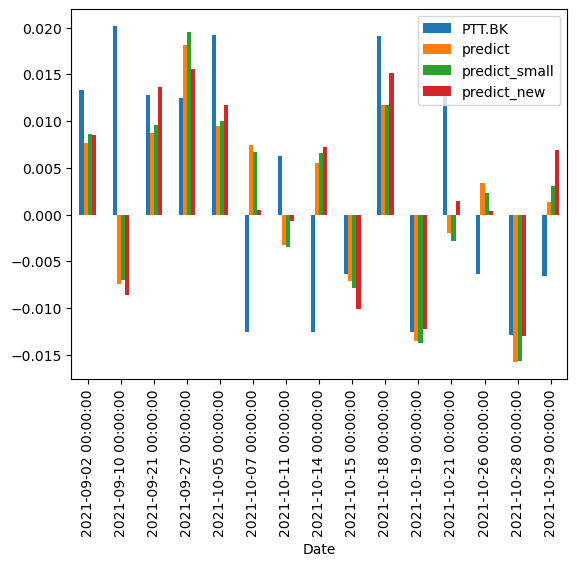

In [83]:
rf_new = RandomForestRegressor(n_estimators=200, max_depth =3,random_state =9)
rf_new.fit(new_X_train, y_train)
predict_new = rf_new.predict(new_X_test)
compare['predict_new'] = predict_new
compare.plot(kind='bar')

In [84]:
compare

,PTT.BK,predict,predict_small,predict_new
Date,,,,
2021-09-02,0.013333,0.007668,0.008626,0.008502
2021-09-10,0.020134,-0.007414,-0.006981,-0.008626
2021-09-21,0.012821,0.008713,0.009621,0.013650
2021-09-27,0.012500,0.018161,0.019569,0.015532
2021-10-05,0.019231,0.009488,0.010060,0.011691
2021-10-07,-0.012500,0.007483,0.006687,0.000468
2021-10-11,0.006289,-0.003281,-0.003478,-0.000623
2021-10-14,-0.012500,0.005533,0.006611,0.007236
2021-10-15,-0.006329,-0.007132,-0.007793,-0.010077


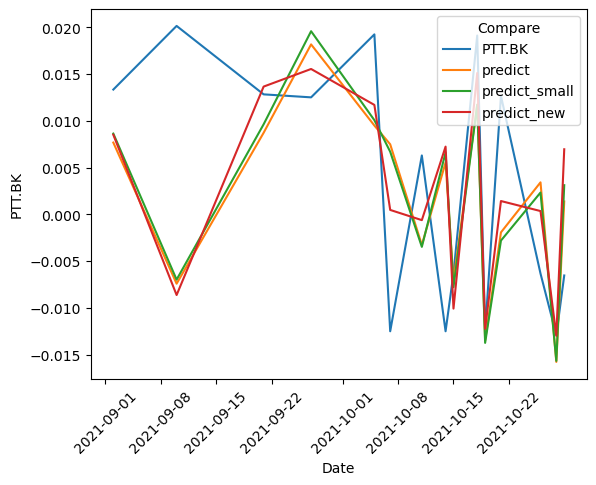

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Date', y='PTT.BK', data=compare)
sns.lineplot(x='Date', y='predict', data=compare)
sns.lineplot(x='Date', y='predict_small', data=compare)
sns.lineplot(x='Date', y='predict_new', data=compare)
plt.xticks(rotation=45)
plt.legend(title='Compare', loc='upper right', labels=['PTT.BK', 'predict','predict_small','predict_new'])



# Put a legend to the right of the current axis


plt.show()